# Deep Learning and Neural Network - Question 2
## Arian Firoozi - 810100196
## Arman Majidi - 810100205

# Outline
- [ 0 - Packages ](#0)
- [ 1 - Data Downloading ](#1)
- [ 2 - Data Preperation ](#2)
- [ 3 - Model Implementation ](#3)
- [ 4 - ARIMA Model ](#4)

---

<a name="0"></a>
## 0 - Packages 

# First, let's run the cell below to import all the packages.
- [numpy](https://numpy.org) is the fundamental package for working with matrices in Python.
- [pandas](https://pandas.pydata.org) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [seaborn](https://seaborn.pydata.org) is a Python data visualization library based on matplotlib.
- [tensorflow](https://tensorflow.org) is an end-to-end platform for machine learning.
- [keras](https://keras.io) is a deep learning API written in Python and capable of running on top of either JAX, TensorFlow, or PyTorch.
- [scikit-learn](https://scikit-learn.org) is a Python module for machine learning.
- [yfinance](https://ranaroussi.github.io/yfinance/index.html) is an open-source tool that uses Yahoo’s publicly available APIs, and is intended for research and educational purposes.
- [statmodels](https://www.statsmodels.org/stable) is a Python module that provides classes and functions for the estimation of many different statistical models.
- [pmdarima](https://alkaline-ml.com/pmdarima) is a statistical library designed to fill the void in Python's time series analysis capabilities.

In [1]:
!pip install yfinance pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=300752 sha256=6636899557211ff78574e96e019fd35c95f69a44acd3b53740bb919e8502ce8a
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

---

<a name="1"></a>
## 1 - Data Downloading

In [3]:
data_name = 'data.csv'

In [4]:
CLF = yf.download("CL=F", start="2010-01-01", end=None)
CLF.reset_index(inplace=True)
CLF.columns = CLF.columns.get_level_values(0)
CLF.rename(columns={'Price': 'Date'}, inplace=True)
CLF.to_csv(data_name, index=False)

[*********************100%***********************]  1 of 1 completed


---

<a name="2"></a>
## 2 - Data Preparation

In [5]:
df = pd.read_csv(data_name)
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,81.510002,81.510002,81.680000,79.629997,79.629997,263542
1,2010-01-05,81.769997,81.769997,82.000000,80.949997,81.629997,258887
2,2010-01-06,83.180000,83.180000,83.519997,80.849998,81.430000,370059
3,2010-01-07,82.660004,82.660004,83.360001,82.260002,83.199997,246632
4,2010-01-08,82.750000,82.750000,83.470001,81.800003,82.650002,310377
...,...,...,...,...,...,...,...
3760,2024-12-13,71.290001,71.290001,71.419998,69.870003,70.059998,230429
3761,2024-12-16,70.709999,70.709999,71.440002,70.370003,71.440002,204296
3762,2024-12-17,70.080002,70.080002,70.919998,69.180000,70.610001,99604
3763,2024-12-18,70.580002,70.580002,71.379997,69.989998,70.220001,99604


### ◆ Null Data and Random Data Removing

In [6]:
df.dropna(axis=0, how='any', inplace=True)
num_rows_to_delete = int(len(df) * 0.1)
rows_to_delete = df.sample(n=num_rows_to_delete, random_state=24).index
df.drop(rows_to_delete, inplace=True)
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,81.510002,81.510002,81.680000,79.629997,79.629997,263542
1,2010-01-05,81.769997,81.769997,82.000000,80.949997,81.629997,258887
2,2010-01-06,83.180000,83.180000,83.519997,80.849998,81.430000,370059
4,2010-01-08,82.750000,82.750000,83.470001,81.800003,82.650002,310377
5,2010-01-11,82.519997,82.519997,83.949997,81.959999,82.879997,296304
...,...,...,...,...,...,...,...
3759,2024-12-12,70.019997,70.019997,70.720001,69.139999,70.430000,326046
3761,2024-12-16,70.709999,70.709999,71.440002,70.370003,71.440002,204296
3762,2024-12-17,70.080002,70.080002,70.919998,69.180000,70.610001,99604
3763,2024-12-18,70.580002,70.580002,71.379997,69.989998,70.220001,99604


### ◆ Data Interpolation

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)
full_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df_reindexed = df.reindex(full_date_range)
df_interpolated = df_reindexed.interpolate()
df_final = df_interpolated.reset_index()
df_final.rename(columns={'index': 'Date'}, inplace=True)
df_final

,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,81.510002,81.510002,81.680000,79.629997,79.629997,263542.0
1,2010-01-05,81.769997,81.769997,82.000000,80.949997,81.629997,258887.0
2,2010-01-06,83.180000,83.180000,83.519997,80.849998,81.430000,370059.0
3,2010-01-07,82.965000,82.965000,83.494999,81.325001,82.040001,340218.0
4,2010-01-08,82.750000,82.750000,83.470001,81.800003,82.650002,310377.0
...,...,...,...,...,...,...,...
5459,2024-12-15,70.537498,70.537498,71.260002,70.062502,71.187502,234733.5
5460,2024-12-16,70.709999,70.709999,71.440002,70.370003,71.440002,204296.0
5461,2024-12-17,70.080002,70.080002,70.919998,69.180000,70.610001,99604.0
5462,2024-12-18,70.580002,70.580002,71.379997,69.989998,70.220001,99604.0


### ◆ Train-Test Split and Min-Max Normalization

#### Needed Functions

In [8]:
def create_windows(data, window_size=2, overlap=0.5):
    step = int(window_size * (1 - overlap))
    x, y = [], []
    for i in range(0, len(data) - window_size, step):
        x.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(x), np.array(y)

In [9]:
def prepare_train_test(train_data, test_data, window_size=2, overlap=0.5):
    x_train, y_train = create_windows(train_data, window_size, overlap)
    x_test, y_test = create_windows(test_data, window_size, overlap)
    return x_train, y_train, x_test, y_test

#### Train-Test Split

In [10]:
data = np.array(df_final['Adj Close'])
data = np.abs(data)
ind = int(len(data) * 0.7)
train = data[:ind]
test = data[ind:]
x_train, y_train, x_test, y_test = prepare_train_test(train, test)

In [11]:
print(f'''x_train shape: {x_train.shape} and y_train shape: {y_train.shape}
x_test shape: {x_test.shape} and y_test shape: {y_test.shape}''')

x_train shape: (3822, 2) and y_train shape: (3822,)
x_test shape: (1638, 2) and y_test shape: (1638,)


#### Min-Max Normalization

In [12]:
min = np.min(x_train, 0)
max = np.max(x_train, 0)
x_train = (x_train - min) / (max - min)
x_test = (x_test - min) / (max - min)

### ◆ Histogram Plotting

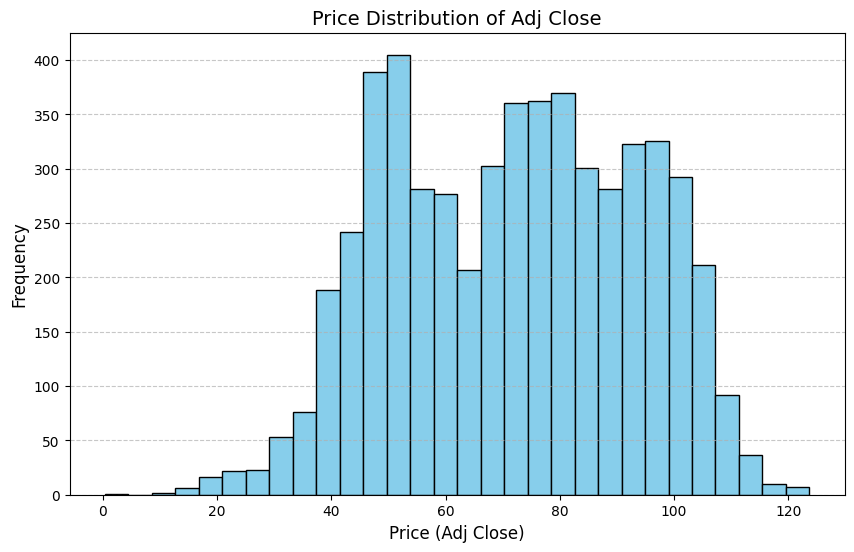

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black')  # Adjust bins for granularity
plt.xlabel('Price (Adj Close)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Price Distribution of Adj Close', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

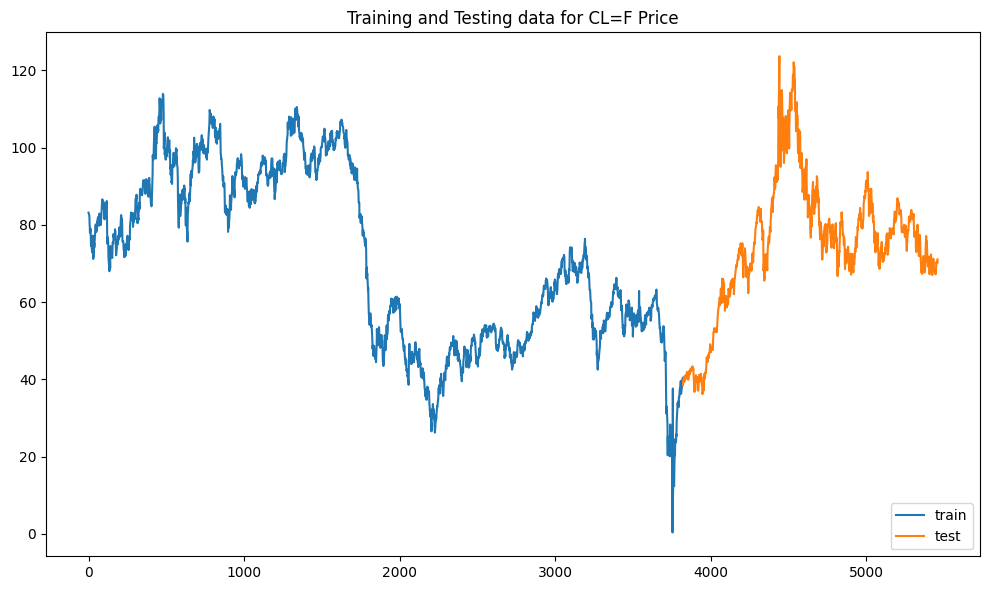

In [14]:
train_indices = np.arange(len(y_train))
test_indices = np.arange(len(y_train), len(y_train) + len(y_test))
plt.figure(figsize=(10, 6))
plt.plot(train_indices, y_train, label='train')
plt.plot(test_indices, y_test, label='test')
plt.title('Training and Testing data for CL=F Price')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

---

<a name="3"></a>
## 3 - Model Implementation

### ◆ Hyperparameters

In [15]:
input_shape = (x_train.shape[1], 1)
learning_rate = 0.001
batch_size = 100
gruOptimizer = Adam(learning_rate=learning_rate)
lstmOptimizer = Adam(learning_rate=learning_rate)
bilstmOptimizer = Adam(learning_rate=learning_rate)
epoches = 50
units = {
    'LSTM': 512,
    'GRU': 512,
    'Bi-LSTM': 1024
}
metrics = [keras.metrics.MeanAbsoluteError(), keras.metrics.RootMeanSquaredError(),
           keras.metrics.R2Score(), keras.metrics.MeanAbsolutePercentageError()]

### ◆ GRU Model

In [16]:
gruModel = Sequential([
    GRU(units['GRU'], return_sequences=True, input_shape=input_shape),
    GRU(units['GRU'], return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
    ])
gruModel.compile(optimizer=gruOptimizer, loss='mse', metrics=metrics)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
gruModel.fit(x_train, y_train, batch_size=batch_size, epochs=epoches)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4298.7061 - mean_absolute_error: 59.7733 - mean_absolute_percentage_error: 83.1027 - r2_score: -7.3723 - root_mean_squared_error: 65.0763
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 533.8409 - mean_absolute_error: 20.6775 - mean_absolute_percentage_error: 38.9134 - r2_score: -0.0256 - root_mean_squared_error: 23.1027
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 508.6112 - mean_absolute_error: 20.1111 - mean_absolute_percentage_error: 36.1807 - r2_score: -4.6939e-04 - root_mean_squared_error: 22.5474
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 527.1063 - mean_absolute_error: 20.5238 - mean_absolute_percentage_error: 38.0711 - r2_score: 7.1865e-04 - root_mean_squared_error: 22.9585
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 519.0955 - mean_absolute_error: 20.3299 - mean_absolute_percentage_error: 39.1566 - r2_score: 0.0042 - root_mean_squared_error: 22.7816
Epoch 6/50
39/39 ━

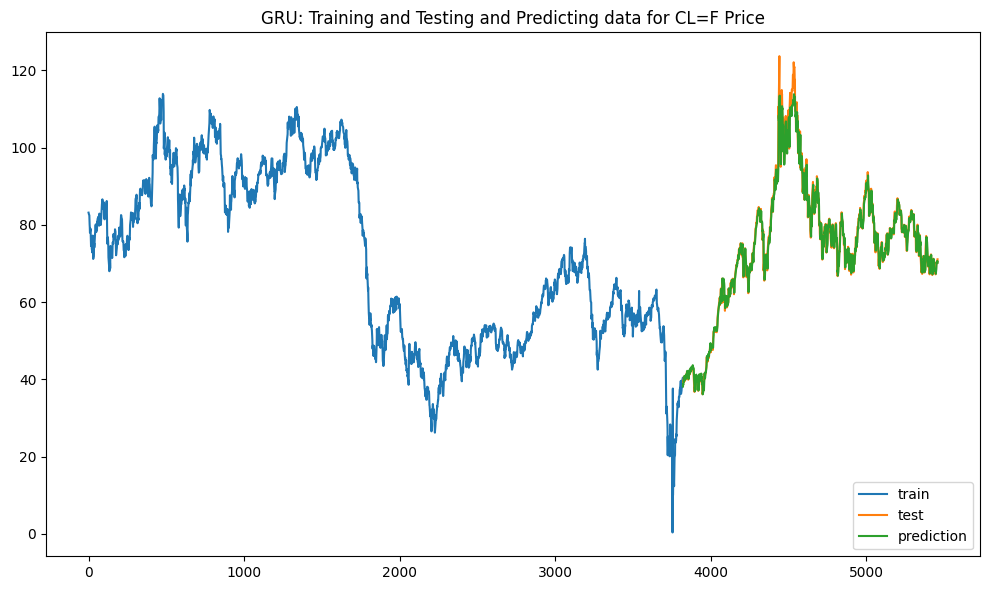

In [18]:
y_pred = gruModel.predict(x_test, verbose=0)
train_indices = np.arange(len(y_train))
test_indices = np.arange(len(y_train), len(y_train) + len(y_test))
pred_indices = np.arange(len(y_train), len(y_train) + len(y_pred))
plt.figure(figsize=(10, 6))
plt.plot(train_indices, y_train, label='train')
plt.plot(test_indices, y_test, label='test')
plt.plot(pred_indices, y_pred, label='prediction')
plt.title('GRU: Training and Testing and Predicting data for CL=F Price')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### ◆ LSTM Model

In [19]:
lstmModel = Sequential([
    LSTM(units['LSTM'], return_sequences=True, input_shape=input_shape),
    LSTM(units['LSTM'], return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
    ])
lstmModel.compile(optimizer=lstmOptimizer, loss='mse', metrics=metrics)

In [20]:
lstmModel.fit(x_train, y_train, batch_size=batch_size, epochs=epoches)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4634.9961 - mean_absolute_error: 20.0773 - mean_absolute_percentage_error: 29.6007 - r2_score: -1.6751 - root_mean_squared_error: 36.4914
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 505.0977 - mean_absolute_error: 19.6461 - mean_absolute_percentage_error: 37.6848 - r2_score: 0.0219 - root_mean_squared_error: 22.4695
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 376.2590 - mean_absolute_error: 17.2318 - mean_absolute_percentage_error: 34.3417 - r2_score: 0.2905 - root_mean_squared_error: 19.3827
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 190.0028 - mean_absolute_error: 12.1956 - mean_absolute_percentage_error: 34.3126 - r2_score: 0.6357 - root_mean_squared_error: 13.7507
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.7501 - mean_absolute_error: 4.4029 - mean_absolute_percentage_error: 6.8605 - r2_score: 0.9431 - root_mean_squared_error: 5.3903
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━

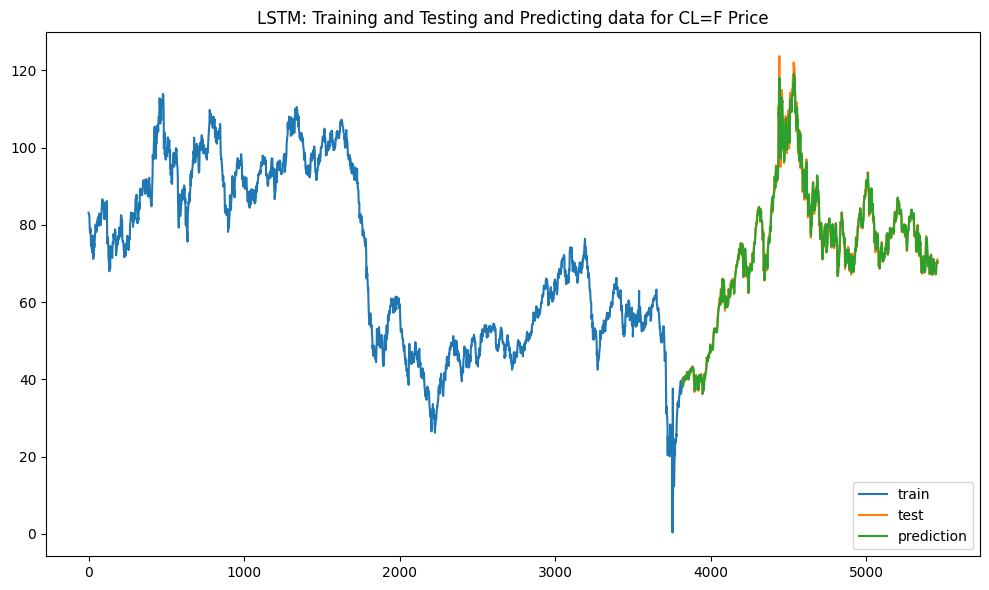

In [21]:
y_pred = lstmModel.predict(x_test, verbose=0)
train_indices = np.arange(len(y_train))
test_indices = np.arange(len(y_train), len(y_train) + len(y_test))
pred_indices = np.arange(len(y_train), len(y_train) + len(y_pred))
plt.figure(figsize=(10, 6))
plt.plot(train_indices, y_train, label='train')
plt.plot(test_indices, y_test, label='test')
plt.plot(pred_indices, y_pred, label='prediction')
plt.title('LSTM: Training and Testing and Predicting data for CL=F Price')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### ◆ Bi-LSTM Model

In [22]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [23]:
bilstmModel = Sequential([
    Bidirectional(LSTM(units['Bi-LSTM'], return_sequences=True, input_shape=input_shape)),
    Bidirectional(LSTM(units['Bi-LSTM'], return_sequences=False)),
    Dense(25, activation='relu'),
    Dense(1)
    ])
bilstmModel.compile(optimizer=bilstmOptimizer, loss='mse', metrics=metrics)

In [24]:
bilstmModel.fit(x_train, y_train, batch_size=batch_size, epochs=epoches)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 3269.7893 - mean_absolute_error: 14.4839 - mean_absolute_percentage_error: 22.5124 - r2_score: -0.6689 - root_mean_squared_error: 29.1761
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 252.2168 - mean_absolute_error: 13.9599 - mean_absolute_percentage_error: 30.5329 - r2_score: 0.5301 - root_mean_squared_error: 15.7957
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 17.8716 - mean_absolute_error: 3.2638 - mean_absolute_percentage_error: 5.4556 - r2_score: 0.9653 - root_mean_squared_error: 4.1927
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.4528 - mean_absolute_error: 2.2222 - mean_absolute_percentage_error: 5.3994 - r2_score: 0.9842 - root_mean_squared_error: 2.9061
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.3566 - mean_absolute_error: 1.7906 - mean_absolute_percentage_error: 4.2342 - r2_score: 0.9878 - root_mean_squared_error: 2.5193
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━

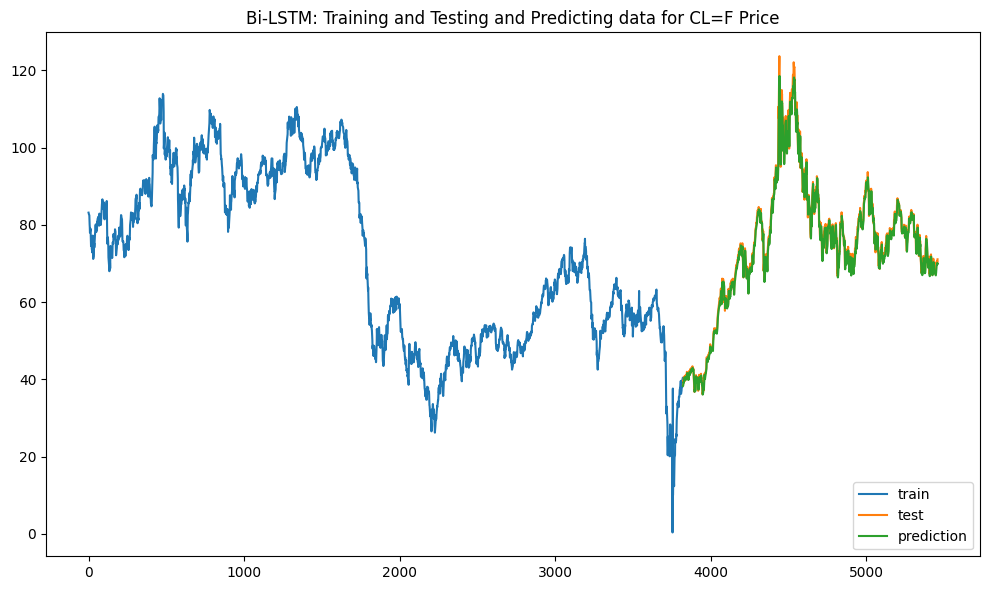

In [25]:
y_pred = bilstmModel.predict(x_test, verbose=0)
train_indices = np.arange(len(y_train))
test_indices = np.arange(len(y_train), len(y_train) + len(y_test))
pred_indices = np.arange(len(y_train), len(y_train) + len(y_pred))
plt.figure(figsize=(10, 6))
plt.plot(train_indices, y_train, label='train')
plt.plot(test_indices, y_test, label='test')
plt.plot(pred_indices, y_pred, label='prediction')
plt.title('Bi-LSTM: Training and Testing and Predicting data for CL=F Price')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

---

<a name="4"></a>
## 4 - ARIMA Model

### ◆ Getting Best Order

In [26]:
model = auto_arima(y_train, seasonal=True, stepwise=True, trace=True, suppress_warnings=True, n_jobs=-1)
print(model.summary())
best_order = model.order
print(f"Best ARIMA order (p, d, q): {best_order}")

/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12119.414, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12219.268, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12212.693, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12209.999, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12217.603, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12135.106, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12124.445, Time=0.64 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12117.415, Time=1.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12115.680, Time=0.69 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=12113.723, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12152.076, Time=0.30 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=12115.686, Time=0.65 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=12117.683, Time=0.75 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=12112.110, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0

### ◆ ARIMA Model with Best Order

In [27]:
arimaModel = ARIMA(y_train, order=best_order)
model_fit = arimaModel.fit()
y_pred = model_fit.forecast(steps=len(y_test))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Squared Error (MSE): 1465.57
Mean Absolute Error (MAE): 34.42
Root Mean Squared Error (RMSE): 38.28
R-squared (R2): -4.07
Mean Absolute Percentage Error (MAPE): 42.72%


---